# 資料探索

## 針對Kaggle的Titanic倖存預測競賽，將分為下列三個階段來進行

### 資料分析 Data analysis
- 了解資料, 資料形態、架構的掌握
- 資料發現Data exploration
- 資料的相關及變異

### 特徵工程 Feature engineering
- Feature cleaning
- feature imputation
- feature selection
- feature encoding
- feature scaling

### 模型建立與訓練
- 模型選擇 (演算法選擇)
- model training
- model scoring
- model evauation
- predict

## loading module

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [69]:
df_train = pd.read_csv('Titanic\Kaggle data\\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 資料分析 Data analysis
- 了解資料, 資料形態、架構的掌握

#### .info() 就可以看全部

In [9]:
print(df_train.shape)
print('----------------------------')
print(df_train.info())


(891, 12)
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### 看數值的統計量

In [10]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### 檢視非數值欄位：

In [11]:
df_train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 資料分析 Data analysis

#### 資料的相關及變異 1

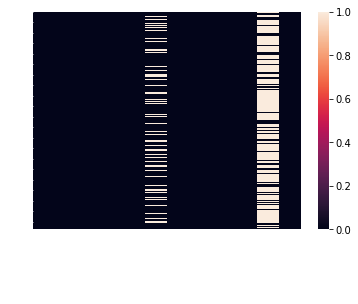

In [70]:
data = df_train
ax = sns.heatmap(data.isnull())

# ax.set_xlabel('Species', color='white')
# ax.set_ylabel('count', color='white')
ax.tick_params(colors='white', which='both')

#### 資料的相關及變異 2

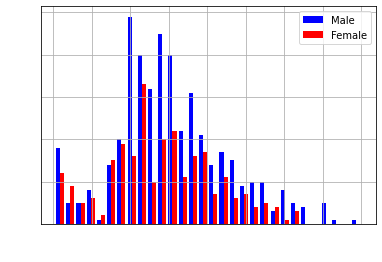

In [22]:
# figure = plt.figure(figsize = (15, 8))
plt.hist([data[data['Sex'] == 'male']['Age'], data[data['Sex'] == 'female']['Age']], 
    stacked = False, color = ['b', 'r'], bins = 30, label = ['Male', 'Female'])
plt.xlabel('Age', color = 'white')
plt.ylabel('Number of Sex', color = 'white')
plt.tick_params(axis = 'both', colors = 'white')
plt.grid()
plt.legend()

#### 資料的相關及變異 3

In [17]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(
    by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### 資料的相關及變異 4

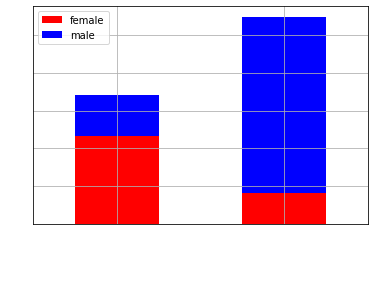

In [25]:
survived = data[data['Survived'] == 1]['Sex'].value_counts()
# print(survived)
dead = data[data['Survived'] == 0]['Sex'].value_counts()
# print(dead)
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']

ax = plt.gca()
df.plot(ax=ax, kind='bar', stacked='True', color = ['r', 'b'])
# df.plot(ax=ax, kind='bar', stacked='True', figsize=(15,8))
ax.set_xlabel('Survived', color='white')
ax.tick_params(axis='both', colors='white')
ax.grid()

#### 資料的相關及變異 5

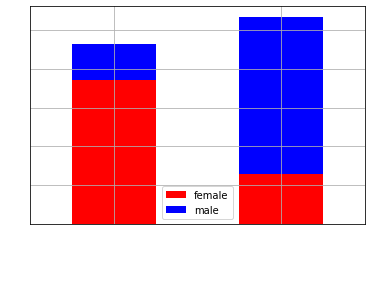

In [26]:
# 算出男女總人數
total_sex = data['Sex'].value_counts()

# 男女存活比例
p_survived = data[data['Survived'] == 1]['Sex'].value_counts() / total_sex
p_dead = data[data['Survived'] == 0]['Sex'].value_counts() / total_sex

df = pd.DataFrame([p_survived, p_dead])
df.index = ['Survived', 'Dead']

ax = plt.gca()
df.plot(ax=ax, kind='bar', stacked=True, color=['r', 'b'])
ax.tick_params(axis='both', colors='white')
ax.grid()

#### 資料的相關及變異 6

In [30]:
for title in ['Mr.', 'Sir.', 'Dr.', 'Major.', 'Master.']:
    num = data[data['Name'].str.contains(title)]['Name'].count()
    age = data[data['Name'].str.contains(title)]['Age'].mean()
    print(f'{title:s} {num:d} males, Age average is {age:.3f}')

print('---------------------')

for title in ['Ms.', 'Miss.', 'Mrs.', 'Lady.']:
    num = data[data['Name'].str.contains(title)]['Name'].count()
    age = data[data['Name'].str.contains(title)]['Age'].mean()
    print(f'{title:s} {num:d} females, Age average is {age:.3f}')


Mr. 647 males, Age average is 33.118
Sir. 3 males, Age average is 35.500
Dr. 11 males, Age average is 39.444
Major. 2 males, Age average is 48.500
Master. 40 males, Age average is 4.574
---------------------
Ms. 1 females, Age average is 28.000
Miss. 182 females, Age average is 21.774
Mrs. 129 females, Age average is 35.643
Lady. 1 females, Age average is 48.000


#### 資料的相關及變異 7

In [34]:
for title in ['Mr.', 'Sir.', 'Dr.', 'Major.', 'Master.']:
    num_survived = data[(data['Survived'] == 1) & (data['Name'].str.contains(title))]['Name'].count()
    num_dead = data[(data['Survived'] == 0) & (data['Name'].str.contains(title))]['Name'].count()
    print(f'{title:s} total: {(num_survived+num_dead):d} -> {num_survived:d} survived, {num_dead:d} dead, {(num_survived/(num_survived+num_dead))*100:.2f}% survived rate')

print('---------------------')

for title in ['Ms.', 'Miss.', 'Mrs.', 'Lady.']:
    num_survived = data[(data['Survived'] == 1) & (data['Name'].str.contains(title))]['Name'].count()
    num_dead = data[(data['Survived'] == 0) & (data['Name'].str.contains(title))]['Name'].count()
    print(f'{title:s} total: {(num_survived+num_dead):d} -> {num_survived:d} survived, {num_dead:d} dead, {(num_survived/(num_survived+num_dead))*100:.2f}% survived rate')



Mr. total: 647 -> 184 survived, 463 dead, 28.44% survived rate
Sir. total: 3 -> 1 survived, 2 dead, 33.33% survived rate
Dr. total: 11 -> 6 survived, 5 dead, 54.55% survived rate
Major. total: 2 -> 1 survived, 1 dead, 50.00% survived rate
Master. total: 40 -> 23 survived, 17 dead, 57.50% survived rate
---------------------
Ms. total: 1 -> 1 survived, 0 dead, 100.00% survived rate
Miss. total: 182 -> 127 survived, 55 dead, 69.78% survived rate
Mrs. total: 129 -> 102 survived, 27 dead, 79.07% survived rate
Lady. total: 1 -> 1 survived, 0 dead, 100.00% survived rate


#### 資料的相關及變異 8

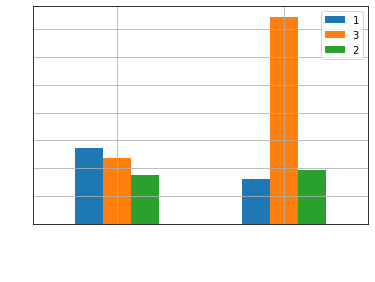

In [37]:
survived_pclass = data[data['Survived'] == 1]['Pclass'].value_counts()
dead_pclass = data[data['Survived'] == 0]['Pclass'].value_counts()
df = pd.DataFrame([survived_pclass, dead_pclass])
df.index = ['Survived', 'Dead']

ax = plt.gca()
df.plot(ax=ax, kind='bar', stacked=False, color=['r', 'b', 'g'])
ax.tick_params(axis='both', colors='white')
ax.grid()

#### 資料的相關及變異 9


In [38]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### 資料的相關及變異 10


In [39]:
data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


#### 資料的相關及變異 11

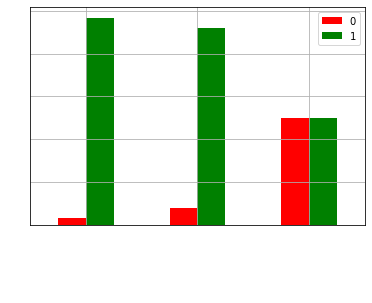

In [48]:
# count() is used to count the number of non-NA/null observations across the given axis. It works with non-floating type data as well.
# value_counts() function returns Series containing counts of unique values.

total_female_p1 = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Survived'].count()
female_p1 = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Survived'].value_counts() / total_female_p1
# print(total_female_p1)
# print(female_p1)
# # pd.set_option('display.max_rows', None)
# x = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Survived']
# print(x.shape)
# print(female_p1[[0,1]])

total_female_p2 = data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]['Survived'].count()
female_p2 = data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]['Survived'].value_counts() / total_female_p2

total_female_p3 = data[(data['Pclass'] == 3) & (data['Sex'] == 'female')]['Survived'].count()
female_p3 = data[(data['Pclass'] == 3) & (data['Sex'] == 'female')]['Survived'].value_counts() / total_female_p3

df = pd.DataFrame([female_p1[[0,1]], female_p2[[0,1]], female_p3[[0,1]]])
df.index = ['Female in P1', 'Female in P2', 'Female in P3']

ax = plt.gca()
df.plot(ax=ax, kind='bar', stacked=False, color = ['r', 'g'])
ax.tick_params(axis = 'both', colors = 'white')
ax.grid()


#### 資料的相關及變異 12

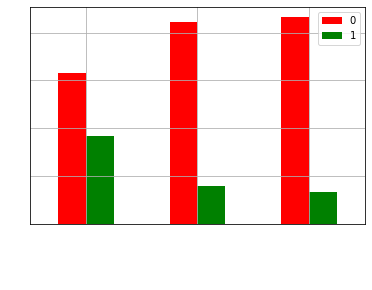

In [49]:
# count() is used to count the number of non-NA/null observations across the given axis. It works with non-floating type data as well.
# value_counts() function returns Series containing counts of unique values.

total_male_p1 = data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Survived'].count()
male_p1 = data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Survived'].value_counts() / total_male_p1

total_male_p2 = data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Survived'].count()
male_p2 = data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Survived'].value_counts() / total_male_p2

total_male_p3 = data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]['Survived'].count()
male_p3 = data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]['Survived'].value_counts() / total_male_p3

df = pd.DataFrame([male_p1[[0,1]], male_p2[[0,1]], male_p3[[0,1]]])
df.index = ['Male in P1', 'Male in P2', 'Male in P3']

ax = plt.gca()
df.plot(ax=ax, kind='bar', stacked=False, color = ['r', 'g'])
ax.tick_params(axis = 'both', colors = 'white')
ax.grid()

#### 資料的相關及變異 13

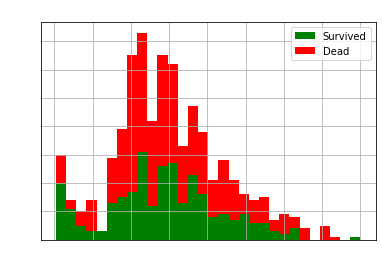

In [50]:
plt.hist([data[data['Survived'] == 1]['Age'], data[data['Survived'] == 0]['Age']], stacked=True, color=['g', 'r'], bins=30, label=['Survived', 'Dead'])
plt.xlabel('Age', color='white')
plt.ylabel('Number of passengers', color='white')
plt.title('Age distribution of passengers', color='white')
plt.legend(loc='best', frameon=True)
plt.tick_params(axis='both', colors='white')
plt.grid()
plt.show()


#### 資料的相關及變異 14

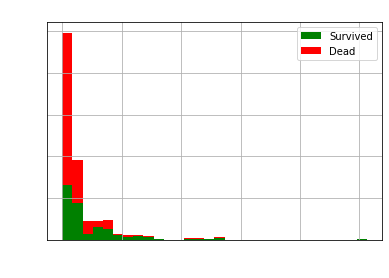

In [51]:
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], stacked=True, color=['g', 'r'], bins=30, label=['Survived', 'Dead'])
plt.xlabel('Fare', color='white')
plt.ylabel('Number of passengers', color='white')
plt.title('Fare distribution of passengers', color='white')
plt.legend(loc='best', frameon=True)
plt.tick_params(axis='both', colors='white')
plt.grid()
plt.show()


#### 資料的相關及變異 15

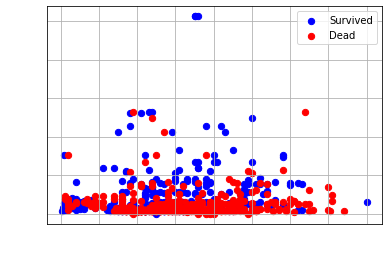

In [58]:
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'], color='green', s=40)
ax.scatter(data[data['Survived']==0]['Age'], data[data['Survived']==0]['Fare'], color='red', s=40)
# ax.scatter(data[(data['Sex'] == 'female') & (data['Survived']==1)]['Age'], data[(data['Sex']=='female') & (data['Survived']==1)]['Fare'], color='red', s=40)
# ax.scatter(data[(data['Sex'] == 'male') & (data['Survived']==1)]['Age'], data[(data['Sex']=='male') & (data['Survived']==1)]['Fare'], color='blue', s=40)
ax.set_xlabel('Age', color='white')
ax.set_ylabel('Fare', color='white')
ax.tick_params(axis='both', colors='white')
ax.legend(('Survived', 'Dead'), scatterpoints=1, loc='upper right', ncol=1)
ax.grid()
plt.show()

#### 資料的相關及變異 16

In [56]:
data['Family'] = data['SibSp'] + data['Parch']
data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


#### 資料的相關及變異 17

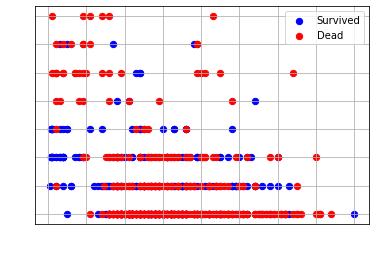

In [59]:
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Family'], color='green', s=40)
ax.scatter(data[data['Survived']==0]['Age'], data[data['Survived']==0]['Family'], color='red', s=40)
ax.set_xlabel('Age', color='white')
ax.set_ylabel('Family', color='white')
ax.tick_params(axis='both', colors='white')
ax.legend(('Survived', 'Dead'), scatterpoints=1, loc='upper right', ncol=1)
ax.grid()
plt.show()

#### 資料的相關及變異 18

In [60]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


0    0.663043
1    0.336957
Name: Survived, dtype: float64


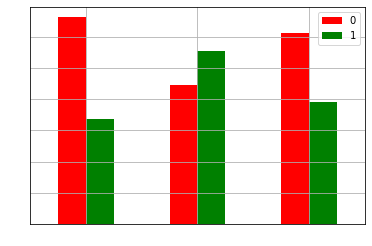

In [64]:
total_Embarked_S = data[data['Embarked'] == 'S']['Survived'].count()
total_Embarked_C = data[data['Embarked'] == 'C']['Survived'].count()
total_Embarked_Q = data[data['Embarked'] == 'Q']['Survived'].count()
Embarked_S = data[data['Embarked'] == 'S']['Survived'].value_counts() / total_Embarked_S
Embarked_C = data[data['Embarked'] == 'C']['Survived'].value_counts() / total_Embarked_C
Embarked_Q = data[data['Embarked'] == 'Q']['Survived'].value_counts() / total_Embarked_Q

print(Embarked_S)

df = pd.DataFrame([Embarked_S, Embarked_C, Embarked_Q])
df.index = ['S', 'C', 'Q']
ax = plt.gca()
df.plot(ax=ax, kind='bar', stacked=False, color = ['r', 'g'])
ax.tick_params(axis = 'both', colors = 'white')
ax.grid()


#### 資料的相關及變異 19

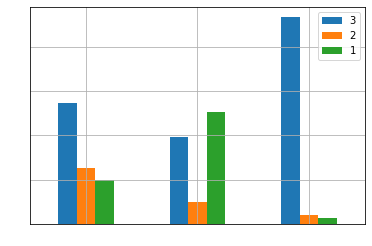

In [65]:
total_Pclass_S = data[data['Embarked'] == 'S']['Pclass'].count()
total_Pclass_C = data[data['Embarked'] == 'C']['Pclass'].count()
total_Pclass_Q = data[data['Embarked'] == 'Q']['Pclass'].count()
Pclass_S = data[data['Embarked'] == 'S']['Pclass'].value_counts() / total_Pclass_S
Pclass_C = data[data['Embarked'] == 'C']['Pclass'].value_counts() / total_Pclass_C
Pclass_Q = data[data['Embarked'] == 'Q']['Pclass'].value_counts() / total_Pclass_Q

df = pd.DataFrame([Pclass_S, Pclass_C, Pclass_Q])
df.index = ['S', 'C', 'Q']
ax = plt.gca()
df.plot(ax=ax, kind='bar', stacked=False)
ax.tick_params(axis = 'both', colors = 'white')
ax.grid()


#### 資料的相關及變異 20

In [72]:
# print(data['Cabin'].fillna('-'))
data['Cabin'].fillna('-', inplace=True)

cabin_list = ['C', 'E', 'G', 'D', 'A', 'B', 'F']
for cabin in cabin_list:
    mask = data['Cabin'].str.contains(cabin)
    data.loc[mask, 'Cabin'] = cabin

print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     -        S  
1      0          PC 17599  71.2833     C        C  
2      0  STON/O2. 3101282   7.9250     -        S  
3      0            113803  53.1000     C        S  
4      0            373450   8.0500     -        S  


#### 資料的相關及變異 21

In [73]:
total_Cabin_p1 = data[data['Pclass'] == 1]['Cabin'].value_counts()
total_Cabin_p2 = data[data['Pclass'] == 2]['Cabin'].value_counts()
total_Cabin_p3 = data[data['Pclass'] == 3]['Cabin'].value_counts()

print(total_Cabin_p1)
print(total_Cabin_p2)
print(total_Cabin_p3)

C    59
B    47
-    40
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64
-    168
F      8
D      4
E      4
Name: Cabin, dtype: int64
-    479
G      7
E      4
F      1
Name: Cabin, dtype: int64


#### 資料的相關及變異 22

In [74]:
total_cabin_survived = data[data['Survived'] == 1]['Cabin'].value_counts()
total_cabin_dead = data[data['Survived'] == 0]['Cabin'].value_counts()
print(total_cabin_survived)
print(total_cabin_dead)

-    206
C     35
B     35
D     25
E     25
A      7
F      7
G      2
Name: Cabin, dtype: int64
-    481
C     24
B     12
E      8
A      8
D      8
G      5
F      2
T      1
Name: Cabin, dtype: int64
